# EDA

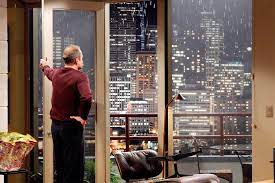

In [10]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
import pandas as pd
import psycopg2

import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

cur = conn.cursor()

sql_query_fetch_all_data = """
    SELECT *
    FROM eda.king_county_house_details
    JOIN eda.king_county_house_sales
    ON eda.king_county_house_details.id = eda.king_county_house_sales.house_id;
"""
cur.execute(sql_query_fetch_all_data)
cur.fetchall()




df_all = pd.read_sql(sql_query_fetch_all_data, conn)


#close the connection
conn.close()


df_all

df_all.to_csv('merged_data.csv',index=False)


C:\Users\David\AppData\Local\Temp\ipykernel_27964\1775024173.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all = pd.read_sql(sql_query_fetch_all_data, conn)


,index,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,21593,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018
21593,21593,21594,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120
21594,21594,21595,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141
21595,21595,21596,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100


In [5]:
df_all.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id'],
      dtype='object')

In [9]:
df_joined_table = pd.read_csv('merged_data.csv')
df_joined_table

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,1,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520
1,2,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192
2,3,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400
3,4,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875
4,5,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21593,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018
21593,21594,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120
21594,21595,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141
21595,21596,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100
